In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


[Text(0, 0, '4360'), Text(0, 0, '1368')]

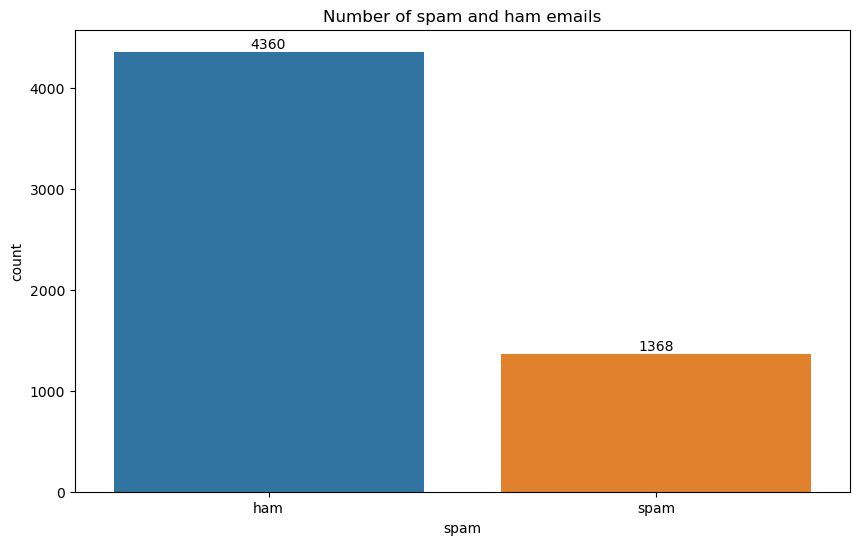

In [3]:
fig = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='spam', data=df)
ax.set_title('Number of spam and ham emails')
ax.set_xticklabels(['ham', 'spam'])
ax.bar_label(ax.containers[0])

In [4]:
df['words'] = df['text'].apply(lambda text: list(set(text.lower().split())))
df.head()

,text,spam,words
0,Subject: naturally irresistible your corporate...,1,"[days, website, %, recollect, organization, ha..."
1,Subject: the stock trading gunslinger fanny i...,1,"[merrill, clockwork, sapling, bedtime, like, c..."
2,Subject: unbelievable new homes made easy im ...,1,"[credit, ask, from, dorcas, complete, website,..."
3,Subject: 4 color printing special request add...,1,"[goldengraphix, irwindale, ramsey, (, 5110, fa..."
4,"Subject: do not have money , get software cds ...",1,"[me, from, best, ., along, great, with, get, i..."


In [5]:
df['spam_worded'] = df['spam'].apply(lambda x: 'spam' if x == 1 else 'ham')
df.head()

,text,spam,words,spam_worded
0,Subject: naturally irresistible your corporate...,1,"[days, website, %, recollect, organization, ha...",spam
1,Subject: the stock trading gunslinger fanny i...,1,"[merrill, clockwork, sapling, bedtime, like, c...",spam
2,Subject: unbelievable new homes made easy im ...,1,"[credit, ask, from, dorcas, complete, website,...",spam
3,Subject: 4 color printing special request add...,1,"[goldengraphix, irwindale, ramsey, (, 5110, fa...",spam
4,"Subject: do not have money , get software cds ...",1,"[me, from, best, ., along, great, with, get, i...",spam


In [6]:
print(df.index)

RangeIndex(start=0, stop=5728, step=1)


In [7]:
word_frequency = {} #prazan set

for ind in df.index:
    for word in df['words'][ind]:
        if word not in word_frequency:
            #word_frequency[word] = {'spam': 0, 'ham': 0}
            word_frequency[word] = {'spam': 1, 'ham': 1} # Pocinjemo sa ovim vrijednostima da bi izbjegli dijeljenje sa nulom kasnije.
        word_frequency[word][df['spam_worded'][ind]] +=1
        
dict(list(word_frequency.items())[:5])


{'days': {'spam': 143, 'ham': 342},
 'website': {'spam': 204, 'ham': 135},
 '%': {'spam': 336, 'ham': 181},
 'recollect': {'spam': 26, 'ham': 1},
 'organization': {'spam': 42, 'ham': 140}}

In [8]:
Pspam = df[df['spam'] == 1].shape[0] / df.shape[0]
Pham = df[df['spam'] == 0].shape[0] / df.shape[0]
NbSpam = df[df['spam'] == 1].shape[0]
NbHam = df[df['spam'] == 0].shape[0]
print(Pspam)
print(Pham)
print(NbSpam)
print(NbHam)

0.2388268156424581
0.7611731843575419
1368
4360


In [11]:
def predict(email):
    words = set(email.lower().split())
    PxSpam = 1.0
    PxHam = 1.0
    for word in words:
        if word in word_frequency:
            ##P(x|Spam) = Product of propabilities P(x_i|Spam)
            PxSpam *= word_frequency[word]['spam'] / NbSpam
            #print(word_frequency[word]['spam'])
            #print(f"frequency of {word} in spam = {word_frequency[word]['spam']}/{NbSpam}")
            #print(word_frequency[word]['spam']/NbSpam)
            #print(f'PxSpam = {PxSpam}')
            
#           ##P(x|Ham) = Product of probabilities P(x_i|Ham)
            PxHam *= word_frequency[word]['ham'] / NbHam
            #print(word_frequency[word]['ham'])
            #print(f"frequency of {word} in ham = {word_frequency[word]['ham']}/{NbHam}")
            #print(word_frequency[word]['ham']/NbHam)
            #print(f'PxHam = {PxHam}')
            
    ##P(x) = P(Spam) * P(x_i|Spam) + P(Ham) * P(x_i|Ham)
    Px = Pspam * PxSpam + Pham * PxHam
    #print(f'Px = {Pspam} * {PxSpam} + {Pham} * {PxHam}')
    
    
    ##Finaly, P(Spam|x) = P(Spam) * P(x|Spam) / P(x)
    P_Spam_x = Pspam * PxSpam / Px
    print(f'P_Spam_x={P_Spam_x}')
    return print(f'The email \"{email}\" has a {round(P_Spam_x*100, 3)}% chance of being spam.')

In [12]:
predict('money but when you buy a mansion you can go to the lottery when i go to the beach with my friends we have a lot of fun')

P_Spam_x=0.9931009834744942
The email "money but when you buy a mansion you can go to the lottery when i go to the beach with my friends we have a lot of fun" has a 99.31% chance of being spam.


In [14]:
predict('Hi, Just texting to see how its going. Hope everything is fine. All the best')

P_Spam_x=0.20907811922523797
The email "Hi, Just texting to see how its going. Hope everything is fine. All the best" has a 20.908% chance of being spam.


In [136]:
#testiranje

In [15]:
X = df.drop(['spam'], axis=1)
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41) #20% for test, 80% for training

In [16]:
train_word_frequency = {}
for ind in X_train.index:
    for word in X_train['words'][ind]:
        if word not in train_word_frequency:
            train_word_frequency[word] = {'spam': 1, 'ham': 1}
        train_word_frequency[word][X_train['spam_worded'][ind]] +=1
        

train_Pspam = y_train.value_counts()[1] / y_train.shape[0]
train_Pham = y_train.value_counts()[0] / y_train.shape[0]
train_NbSpam = y_train.value_counts()[1] 
train_NbHam = y_train.value_counts()[0]

def predict_2(words):
    PxSpam = 1.0
    PxHam = 1.0
    for word in words:
        if word in train_word_frequency:
            
            PxSpam *= train_word_frequency[word]['spam'] / train_NbSpam
            
            PxHam *= train_word_frequency[word]['ham'] / train_NbHam
            
    #P(x) = P(Spam) * P(x_i|Spam) + P(Ham) * P(x_i|Ham)
    Px = train_Pspam * PxSpam + train_Pham * PxHam    
    
    #Finaly, P(Spam|x) = P(Spam) * P(x|Spam) / P(x)
    P_Spam_x = train_Pspam * PxSpam / Px
    if P_Spam_x > 0.5:
        return 1
    else:
        return 0

In [17]:
y_pred = X_test['words'].apply(predict_2)

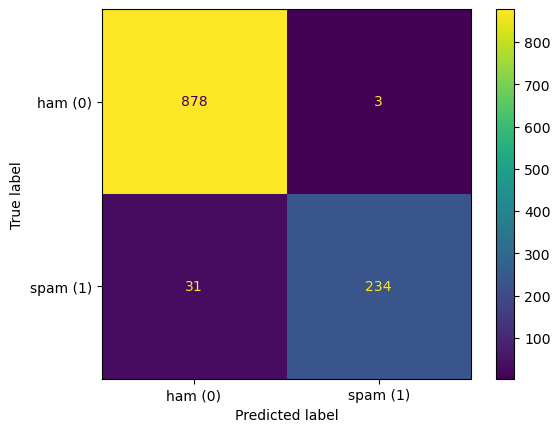

              precision    recall  f1-score   support

     ham (0)       0.97      1.00      0.98       881
    spam (1)       0.99      0.88      0.93       265

    accuracy                           0.97      1146
   macro avg       0.98      0.94      0.96      1146
weighted avg       0.97      0.97      0.97      1146



In [18]:
cm = confusion_matrix(y_test, y_pred)
cmplot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['ham (0)', 'spam (1)'])
cmplot.plot()
plt.show()

print(classification_report(y_test, y_pred, target_names = ['ham (0)', 'spam (1)']))